In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")

import numpy as np
import matplotlib.pyplot as plt
#import analysis_tools2 as analysis_tools

import environments

#plt.style.use("./project_style.mplstyle")
import matplotlib

pane_size = plt.rcParams["figure.figsize"][0]

In [2]:
train_dataset = np.load("../datasets/points/train_dataset.npz")  # load dataset
val_dataset = np.load("../datasets/points/val_dataset.npz")

In [3]:
for name, dataset in zip(("Train", "Val"), (train_dataset, val_dataset)):
    print(f"{name} dataset:")
    print(f"{'Entry:':8} {'Shape:':15} {'dtype:':10}")
    for var in dataset:
        print(f"{var:8} {str(dataset[var].shape):15} {dataset[var].dtype}")

Train dataset:
Entry:   Shape:          dtype:    
r        (12000, 500, 2) float32
c        (12000, 500, 6) float32
Val dataset:
Entry:   Shape:          dtype:    
r        (3000, 500, 2)  float32
c        (3000, 500, 6)  float32


In [4]:
r_train = train_dataset["r"][:]
c_train = train_dataset["c"][:]

env_id = np.argmax(c_train, axis = -1)

labels = ["Square", "Circle", "Large Square", "Rectangle", "Walled Square", "Square Toroid"]

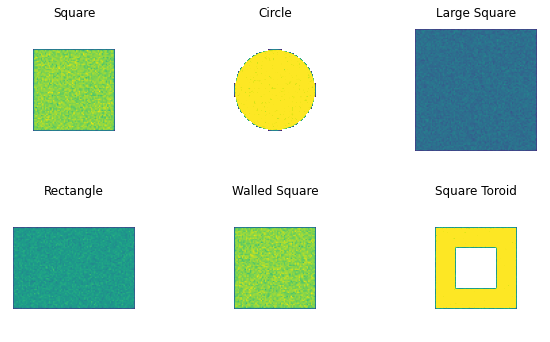

In [5]:
fig =  plt.figure(figsize = (3/2*pane_size, pane_size))
bins = np.linspace(-1.5, 1.5, 100)*1.1

for i in range(c_train.shape[-1]):
    mask = list(env_id == i)
    ax = fig.add_subplot(2, 3, i+1)
    u = r_train[mask]
    hist = np.histogram2d(r_train[mask][...,0].ravel(), r_train[mask][...,1].ravel(), bins)[0]
    hist[hist == 0] = np.nan

    if i == 0:
        vmax = np.nanmax(hist) # calibrate wrt. small quare

    im = ax.imshow(hist.T, origin = "upper", vmin = 0, vmax = vmax)
    ax.set_title(labels[i])
    ax.axis("off")
    
plt.subplots_adjust(wspace=0.5, hspace=0.05) 
#plt.savefig("figures/visitation_density")